In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("poly.csv")
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [166]:
df.shape

(6, 3)

In [167]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [168]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [169]:
df.drop(["sno"],inplace=True,axis=1)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [170]:
df.isna().sum()

Temperature    0
Pressure       0
dtype: int64

In [171]:
x=df.iloc[:,:-1] #[:,1:2]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [172]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

Text(0.5, 1.0, 'temp-pressure')

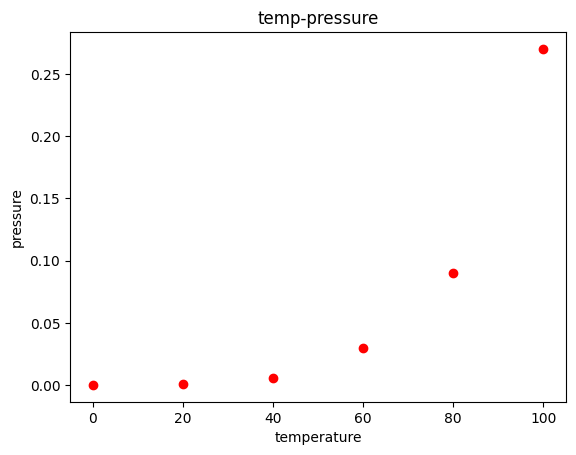

In [173]:
plt.scatter(x,y,color="r")
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("temp-pressure")

In [174]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0.5, 1.0, 'temp-pres')

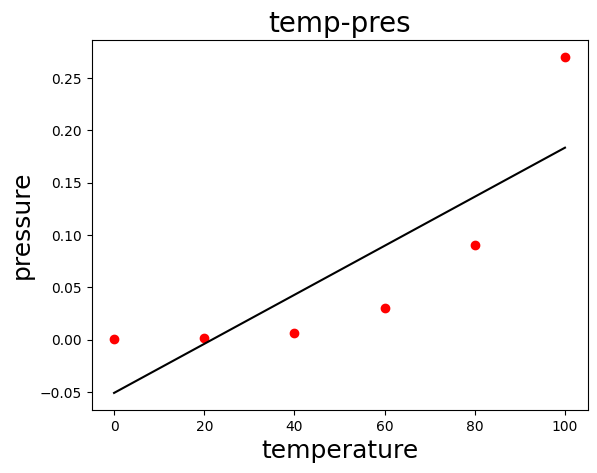

In [175]:
plt.scatter(x,y,color="r")
plt.plot(x,y_pred,color="k")
plt.xlabel("temperature",fontsize=18)
plt.ylabel("pressure",fontsize=18)
plt.title("temp-pres",fontsize=20)


In [176]:
print("slope is",model.coef_)

slope is [0.002342]


In [177]:
print("constant is",model.intercept_)

constant is -0.05086666666666667


In [178]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y,y_pred)
MAPE

44.775078189300416

In [179]:
from sklearn.metrics import r2_score
score=r2_score(y,y_pred)
score

0.690349972603981

In [180]:
#here we use polinomianl
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)#input feature expanded to 3 features(after apply degree=2)
x_poly=poly.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [181]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_pred1=model1.predict(x_poly)
y_pred1

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [182]:

MAPE=mean_absolute_percentage_error(y,y_pred1)
MAPE

2.786591220832721

In [183]:

score=r2_score(y,y_pred1)
score

0.9966691251761722

Text(0.5, 1.0, 'temp-pres')

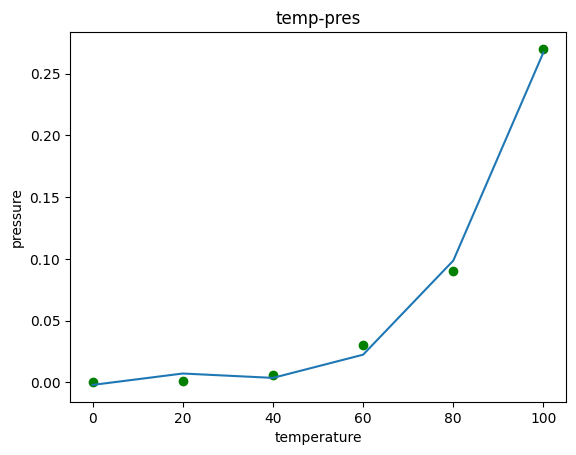

In [185]:
plt.scatter(x,y,color="g")
plt.plot(x,y_pred1)
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("temp-pres")

In [186]:
df1=pd.DataFrame({"actualvalue":y,"predicted":y_pred,"poly predicted":y_pred1})
df1

,actualvalue,predicted,poly predicted
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289
